# Fikspunktiterasjoner og konvergensorden

**TMA4400 Matematikk 1: Kalkulus og lineær algebra**

Dato: **13. oktober 2025**

## Fikspunktiterasjoner

Tidligere har vi sett at $x_0$ er et fikspunkt til funksjonen $f(x)$ dersom

$$
f(x_0)=x_0,
$$

og at vi kan finne dette fikspunktet ved å studere følgen $\{a_n\}_{n=0}^{\infty}\subseteq \mathbb{R}$ gitt rekursivt som

$$
a_{n+1}=f(a_n),\qquad\text{med initialverdien $a_0$.}
$$

Vi skal nå studere fikspunktiterasjoner ytterligere.

#### Eksempel

Vi husker at $x = \sqrt 2$ er et fikspunkt for funksjonen

$$
f(x)=\frac{1}{2}\left(x+\frac{2}{x}\right)
$$

Dette fulgte fra observasjonen

$$
x^2 = 2 \quad \Longleftrightarrow \quad x = \frac 1 2 \left(x + \frac 2 x \right).
$$

Men vi har også

$$
x^2 = 2 \quad \Longleftrightarrow \quad x = \frac 2 x.
$$

Altså er $x = \sqrt 2$ også et fikspunkt for funksjonen

$$
g(x) = \frac 2 x.
$$

La oss se nærmere på følgene

$$ a_{n+1} = f(a_n) \text{, med initialverdi } a_0 = 9$$

og

$$ b_{n+1} = g(b_n) \text{, med initialverdi } b_0 = 9.$$

Under finner dere python-kode for å prøve og å visualisere dette. Prøv gjerne med ulike initialverdier.

Den første kode-snutten implementerer en generell fikspunktiterasjon med hensyn til en gitt funksjon og initialverdi.

In [1]:
import numpy as np

# generisk iterativ fikspunktmetode
def fikspunkt(funksjon, initialverdi, toleranse = 1.0E-8, N = 500):
    følge = [initialverdi] 
    while True:
        følge.append(funksjon(følge[-1]))  # legg til funksjonsverdi av det som var sist i følgen
        if len(følge) == N: # vi avbryter etter N steg uansett
            print("Fant ikke fikspunkt for gitt startverdi Returnerer nåværende verdier.")
            return(følge)
        if abs(følge[-1]-følge[-2]) < toleranse: #abstand mellom de siste to er mindre enn toleranse
            return(følge)

Den neste kode-snutten lager en grafisk illustrasjon av iterasjonen, et såkalt cobweb-plot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# illustratsjon av funksjon F samt cobweb plot
def bilde_fikspunkt(funksjon, følge, left=0.1, right=10.0):
    x = np.linspace(left,right,10000)
    plt.plot(x, funksjon(x), 'b') # plotter F(x) i blått 
    plt.plot(x, x, 'r')    # plotter y = x i rødt
    for n in range(len(følge)-1):
        plt.plot([følge[n], følge[n]], [følge[n], følge[n+1]], 'g') # lager vertikal linje mellom punktene (x,x) og (x,y)
        plt.plot([følge[n], følge[n+1]], [følge[n+1], følge[n+1]], 'g') # lager horisontal linje mellom punktene (x,y) og (y,y)
    plt.show()

La oss nå se på fikspunktiterasjonen for $f$.

n =   0,	 x = 9.000000000000000
n =   1,	 x = 4.611111111111111
n =   2,	 x = 2.522423025435073
n =   3,	 x = 1.657655721288586
n =   4,	 x = 1.432089434900886
n =   5,	 x = 1.414325129015109
n =   6,	 x = 1.414213566773468
n =   7,	 x = 1.414213562373095


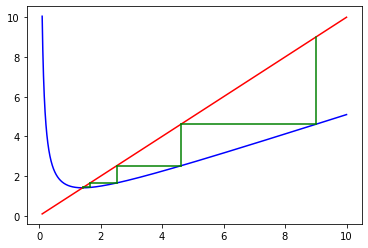

In [3]:
# definerer funksjonen vi skal bruke
f = lambda x: 0.5*(x + (2 / x)) 

a_0 = 9 # en mulig initialverdi

# finner fikspunkt med gitt initialverdi
følge = fikspunkt(f, a_0)

# skriver ut punkter
for n in range(len(følge)):
    print("n = {:3d},\t x = {:1.15f}".format(n,følge[n]))

# be om bilde
bilde_fikspunkt(f, følge)

Nå prøver vi det samme for $g$.

Fant ikke fikspunkt for gitt startverdi Returnerer nåværende verdier.
n =   0,	 x = 9.000000000000000
n =   1,	 x = 0.222222222222222
n =   2,	 x = 9.000000000000000
n =   3,	 x = 0.222222222222222
n =   4,	 x = 9.000000000000000
...
n = 495,	 x = 0.222222222222222
n = 496,	 x = 9.000000000000000
n = 497,	 x = 0.222222222222222
n = 498,	 x = 9.000000000000000
n = 499,	 x = 0.222222222222222


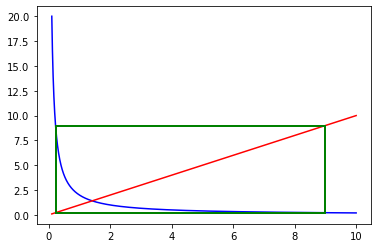

In [4]:
# definerer funksjonen vi skal bruke
g = lambda x: 2/x 

b_0 = 9 # en mulig initialverdi

# finner fikspunkt med gitt initialverdi
følge = fikspunkt(g, b_0)

# skriver ut punkter
for n in range(5):
    print("n = {:3d},\t x = {:1.15f}".format(n,følge[n]))
print("...")
for n in range(495,500):
    print("n = {:3d},\t x = {:1.15f}".format(n,følge[n]))

# be om bilde
bilde_fikspunkt(g, følge)

Fikspunktiterasjonen for $b_{n+1} = g(b_n)$ konvergerer altså ikke mot $\sqrt{2}$ selv om løsningsmengden er gitt ved $x^2=2$ også her. Under ser vi nærmere på når vi kan forvente at en fikspunktiterasjon konvergerer.

## Konvergens av fikspunktiterasjoner

---

**Teorem 1.** Anta at $f(x)$ er kontinuerlig og at følgen $\{a_n\}_{n=0}^{\infty}\subseteq \mathbb{R}$ gitt rekursivt som

$$
a_{n+1}=f(a_n),\qquad\text{med initialverdien $a_0$,}
$$ 

konvergerer og har grenseverdi $\lim_{n\to\infty}a_n=r$. 

Da er $r$ et fikspunkt for $f(x)$, det vil si $f(r) = r$.

**Bevis.**
Når $f(x)$ er kontinuerlig så er

$$ \lim_{n \to \infty} f(a_n) = f( \lim_{n \to \infty} a_n) = f(r).$$

Altså er

$$ r=\lim_{n\to\infty}a_{n+1}=\lim_{n\to\infty}f(a_n)=f(r).$$

---

I Teorem 1 antar vi at grensen $\lim_{n \to \infty} a_n$ eksisterer. Men når kan vi garantere at en fikspunktiterasjon $a_{n+1} = f(a_n)$ faktisk konvergerer? En tilstrekkelig betingelse er at den deriverte $f'$ ikke er for stor i absoluttverdi.


---

**Teorem 2.** Anta at $r$ er et fikspunkt for $f(x)$, at $f'(x)$ er kontinuerlig i et åpent intervall $I = (r-d, r+d)$, og at det finnes et tall $\alpha < 1$ slik at $|f'(x)| \leq \alpha$ for alle $x \in I$. 

Da vil følgen $\{a_n\}_{n=0}^{\infty}\subseteq \mathbb{R}$ gitt rekursivt som

$$
a_{n+1}=f(a_n)
$$ 

konvergere mot $r$ for alle initialverdier $a_0 \in I$.

**Bevis.**
Beviset er basert på middelverdisetningen. Legg merke til at

$$a_{n+1}-r=f(a_n)-f(r)=f'(\xi_n)(a_n-r),\qquad \text{for en $\xi_n$ mellom $a_n$ og $r$.}$$

Dette gir at 

$$|a_{n+1}-r|=|f'(\xi_n)||a_n-r|.$$

Vi ser at hvis $a_n \in I$ så vil $\xi_n \in I$, og derfor $|f'(\xi_n)| \leq \alpha < 1$. Spesielt er

$$|a_{n+1} - r| \leq \alpha |a_n - r| < \alpha d < d,$$

slik at også $a_{n+1} \in I$.

Det følger at

$$ |a_{n+1} - r| \leq \alpha |a_n - r| \leq \alpha^2 |a_{n-1} - r| \leq \cdots \leq \alpha^{n+1} |a_0 - r|,$$

og derfor at

$$ \lim_{n \to \infty} |a_n - r| = 0. $$

Dette betyr at $\lim_{n\to\infty}a_n=r$.

---

**Bemerkning.**
Med betingelsene i teoremet kan $f(x)$ ha maksimalt ett fikspunkt i intervallet $I$:

Anta at $s \in I$ er et fikspunkt. Teorem 2 sier at følgen

$$(s, f(s), f(f(s)), f(f(f(s))), \ldots)$$

konvergerer mot $r$, men siden $s$ er et fikspunkt så er denne følgen konstant lik $s$. Dette kan kun skje hvis $s = r$.

---

**Bemerkning.**
Den eneste grunnen til at vi krevde at intervallet $I$ er symmetrisk rundt $r$ er at vi da kan være sikker på at alle $a_n$ er i intervallet. Vi kan bruke vilkårlige åpne intervaller $I$ med $r \in I$ hvis vi passer på at følgen $(a_n)_{n=0}^\infty$ holder seg i $I$.

---

**Bemerkning.**
Det finnes en versjon av Teorem 2 der det ikke er nødvendig å anta at funksjonen har et fikspunkt. Dette resultatet, kjent som Banachs fikspunktteorem, går vi ikke gjennom i TMA4400.

---

La oss nå igjen se på følgene

$$
a_{n+1} = f(a_n) \quad \text{ og } \quad b_{n+1} = g(b_n)
$$

der

$$
f(x) = \frac 1 2 \left( x + \frac 2 x \right) \quad \text{ og } \quad g(x) = \frac 2 x.
$$

Vi ser at

$$
f'(x) = \frac 1 2 - \frac 1 {x^2}.
$$

Altså er $|f'(x)| \leq \frac 1 2$ for alle $x \geq 1$, og fra Teorem 2 har vi at følgen $(a_n)_{n=0}^{\infty}$ konvergerer mot $\sqrt 2$ for enhver initialverdi $a_0 \geq 1$.

For funksjonen $g(x)$ ser vi at

$$
g'(x) = - \frac 2 {x^2}.
$$

Spesielt er $g'(\sqrt 2) = -1$, så vi kan umulig ha $|g'(x)| < 1$ i et intervall om fikspunktet $x = \sqrt 2$. Derfor kan vi ikke anvende Teorem 2 her.

## Feilanalyse for fikspunktiterasjoner

---

**Definisjon.** Vi definerer feilen $e_n$ i steg $n$ av en fikspunktiterasjon $a_{n+1} = f(a_n)$ som  

$$ e_n=|a_n-r|. $$

Vi definerer også konvergensordenen til å være det positive tallet $q$ hvor grenseverdien

$$
\lim_{n\to\infty}\frac{e_{n+1}}{(e_{n})^q}
$$

eksisterer og er forskjellig fra $0$.

---

Fra beviset av Teorem 2 ser vi at

$$
\lim_{n\to\infty}\frac{e_{n+1}}{e_{n}}=\lim_{n\to\infty}|f'(\xi_n)|=|f'(r)|.
$$

Altså er konvergensorden for fikspunktiterasjonen med $f(x)$ lik 1 dersom $0 \neq |f'(r)|<1$. 

Merk at $|f'(r)|<1$ impliserer at feilen avtar. 

I eksempelet hvor $f(x)=\frac{1}{2}(x+\frac{2}{x})$ ser vi at $f'(\sqrt{2})=0$. I dette tilfellet må vi gjøre en grundigere analyse for å fastslå konvergensordenen $q$. Fra Taylors teorem får vi

$$
f(a_n) - r = f(a_n) - f(r) = \frac 1 2 f''(\xi_n) (a_n - r)^2
$$
for en $\xi_n$ mellom $a_n$ og $r$. Dette gir

$$
\lim_{n\to\infty}\frac{e_{n+1}}{(e_{n})^2}=\lim_{n\to\infty}\frac{1}{2}|f''(\xi_n)|=\frac{1}{2}|f''(r)|,
$$

hvor 

$$
\frac{1}{2}|f''(\sqrt{2})|=\frac{1}{2}\left|\frac{2}{(\sqrt{2})^3}\right|\approx0.3535534.
$$

La oss teste denne teorien numerisk:

In [5]:
# definerer funksjonen vi skal bruke
f = lambda x: 0.5*(x+(2/x)) # vi bruker f(x)

a_0 = 9 # en mulig initialverdi nærme rota av 2

# finner fikspunkt med gitt initialverdi
følge = fikspunkt(f, a_0)

# sjekker forholdet e_{n+1}/(e_n)^2
print("følgens verdi = {:>12}, rota av 2 = {:>12}".format(str(følge[0]), str(np.sqrt(2))))
for i in range(1,len(følge)):
    print("følgens verdi = {:>12}, rota av 2 = {:>12}".format(str(følge[i]), str(np.sqrt(2))))
    print("utregnet forhold = {:>12}, teoretisk forhold = {:>12}".format(str(abs(følge[i]-np.sqrt(2))/(abs(følge[i-1]-np.sqrt(2))**2)), str(2**(-3/2))))
    print("============================================")

følgens verdi =            9, rota av 2 = 1.4142135623730951
følgens verdi = 4.611111111111111, rota av 2 = 1.4142135623730951
utregnet forhold = 0.05555555555555555, teoretisk forhold = 0.3535533905932738
følgens verdi = 2.5224230254350735, rota av 2 = 1.4142135623730951
utregnet forhold = 0.10843373493975902, teoretisk forhold = 0.3535533905932738
følgens verdi = 1.6576557212885863, rota av 2 = 1.4142135623730951
utregnet forhold = 0.19822210428552478, teoretisk forhold = 0.3535533905932738
følgens verdi = 1.4320894349008857, rota av 2 = 1.4142135623730951
utregnet forhold = 0.30163078712829466, teoretisk forhold = 0.3535533905932738
følgens verdi = 1.4143251290151087, rota av 2 = 1.4142135623730951
utregnet forhold = 0.3491402057823368, teoretisk forhold = 0.3535533905932738
følgens verdi = 1.4142135667734679, rota av 2 = 1.4142135623730951
utregnet forhold = 0.3535254970448626, teoretisk forhold = 0.3535533905932738
følgens verdi = 1.414213562373095, rota av 2 = 1.4142135623730951


Det siste utregningen av forholdet $\frac{e_{n+1}}{(e_n)^2}$ gir et for høyt tall pga. flyttallsfeil. Merk at $a_n$ likevel kommer nærmere og nærmere verdien av $\sqrt{2}$ for hver utregning.